# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
from scipy import stats

mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

# null hypothesis: x comes from a normal distribution
# no rejection of null hypothesis

/Users/admin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (0.6544027149109959, 0.7209385620560362)
1      (1.422120866509355, 0.4911231179383656)
2     (3.659576644079497, 0.16044752738611992)
3    (3.7400846518241884, 0.15411713852862283)
4      (1.349200189549965, 0.5093600756391428)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here
tests

# null hypothesis: x comes from a normal distribution
# no rejection of null hypothesis

0     (0.6544027149109959, 0.7209385620560362)
1      (1.422120866509355, 0.4911231179383656)
2     (3.659576644079497, 0.16044752738611992)
3    (3.7400846518241884, 0.15411713852862283)
4      (1.349200189549965, 0.5093600756391428)
dtype: object

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

In [4]:
# Your code here
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here

# when independent random variables are added, their properly normalized sum tends toward a normal distribution (bell curve) 
# even if the original variables themselves are not normally distributed. 


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

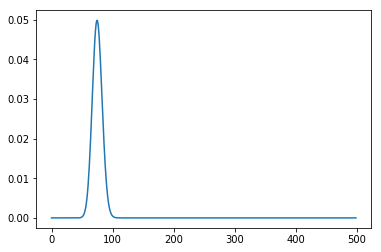

In [15]:
# Your code here
from scipy.stats import binom

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here



#### Now plot PMP with 50, 500, and 5000 visitors.

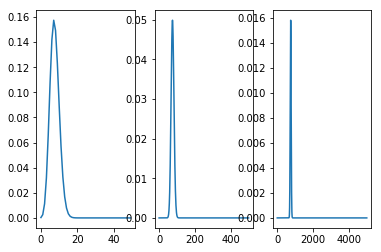

In [16]:
# Your code here


fig, ax = plt.subplots(1, 3)

plt.subplot(1,3,1)
dist = binom(50, 0.15)
plt.plot(range(50), dist.pmf(range(50)))

plt.subplot(1,3,2)
dist=binom(500, 0.15)
plt.plot(range(500), dist.pmf(range(500)))


plt.subplot(1,3,3)
dist= binom(5000, 0.15)
plt.plot(range(5000), dist.pmf(range(5000)))


plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# used as a counting variable (count number of occurrences of an event within a time frame). 
#For this reason Poisson processes are also known as counting processes.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

0.023026546149191047
[309 327 291 310 298 284 295 322 281 283 309 291 259 271 291 300 278 306
 316 312 292 306 292 294 302 286 309 293 292 290 278 308 298 285 274 268
 321 288 319 318 284 299 289 292 275 299 320 259 317 301 295 302 312 312
 289 308 301 312 329 301 302 293 316 300 314 301 303 308 332 286 268 314
 275 305 304 353 313 307 329 316 306 320 310 289 285 312 260 300 272 309
 316 315 305 291 307 303 305 311 270 296 339 294 300 299 276 298 277 281
 300 280 312 297 273 279 293 320 307 307 296 316 278 283 285 323 331 288
 271 287 296 298 290 286 302 327 323 336 294 312 299 304 291 283 311 299
 321 327 284 293 297 325 289 294 319 302 308 291 285 277 302 327 306 307
 284 282 274 275 292 301 309 302 282 296 322 290 286 313 285 295 307 321
 288 327 345 313 312 311 306 317 312 293 306 280 309 269 297 267 322 289
 346 283 313 291 293 326 291 338 301 304 274 272 317 304 270 325 306 304
 282 308 273 307 298 301 295 273 303 301 313 293 302 317 305 313 314 322
 299 301 285 301 307 297 318 3

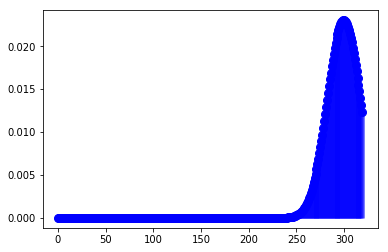

In [20]:
# Your code here

from scipy.stats import poisson
param = 300
po = stats.poisson(param)
print(po.pmf(param))     
print(po.rvs(300))
x = np.arange(0,320)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x, param), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, param), colors='b', lw=5, alpha=0.5)


#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

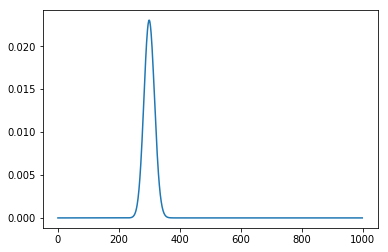

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)